# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json 
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(os.getcwd())

C:\Users\ryans\Ryans\Finanacial Planner


In [3]:
# Load .env enviroment variables
load_dotenv("alpaca.env")

True

In [4]:
#checking dicrectory
os.listdir()

['.ipynb_checkpoints',
 'alpaca.env',
 'financial-planner.ipynb',
 'MCForecastTools.py',
 '__pycache__']

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
Monthly_income = 12000

In [6]:
# Setting Alpaca API key and secret key
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [7]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca_key_type: {(alpaca_api_key)}")
print(f"Alpaca_secret_key_type: {(alpaca_secret_key)}")

Alpaca_key_type: PKJTTSBFCHZU6CIM9F76
Alpaca_secret_key_type: fuEYPVooCiku11eKTqeAPBcH6rJPLTgX16VbGCq6


In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [9]:
#Add format specifier to request url
btc_data = btc_url + "?format=json"
eth_data = eth_url + "?format=json"

In [10]:
#check to see if the API connection is successful
response = requests.get(btc_data)
response2 = requests.get(eth_data)
response
response2

<Response [200]>

In [11]:
# Fetch current BTC price
btc_price = response.json()['data']['1']['quotes']['USD']['price']

# Display sample data
btc_price

# Fetch current ETH price
eth_price = response2.json()['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
btc_quantity = 1.2
eth_quantity = 5.3
#Calculating current value of btc & eth
my_btc_value = btc_price * btc_quantity
my_eth_value = eth_quantity * eth_price

# Print current crypto wallet balance
print(f"The current value of your BTC is ${my_btc_value:0.2f}")
print(f"The current value of your ETH is ${my_eth_value:0.2f}")

The current value of your BTC is $42442.80
The current value of your ETH is $10021.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Setting the current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Setting the Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Creating the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis = 1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys = ['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

HTTPError: 403 Client Error: Forbidden for url: https://data.alpaca.markets/v2/stocks/bars?timeframe=1Day&adjustment=raw&start=2023-10-20T00%3A00%3A00-04%3A00&end=2023-10-20T00%3A00%3A00-04%3A00&symbols=AGG%2CSPY

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.0
Current SPY closing price: $421.19


In [16]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21059.50
The current value of your 200 AGG shares is $18400.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 6000 

# Consolidate financial assets data
consolidated_asset = my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Create savings DataFrame
savings_data = {
    'amount': [consolidated_asset, monthly_income],
}

# Specify the columns and index
columns = ['amount']
index = ['crypto', 'stock/bond']

savings_df = pd.DataFrame(savings_data, columns=columns, index=index)

# Display savings DataFrame
print(savings_df)


               amount
crypto      85320.034
stock/bond   6000.000


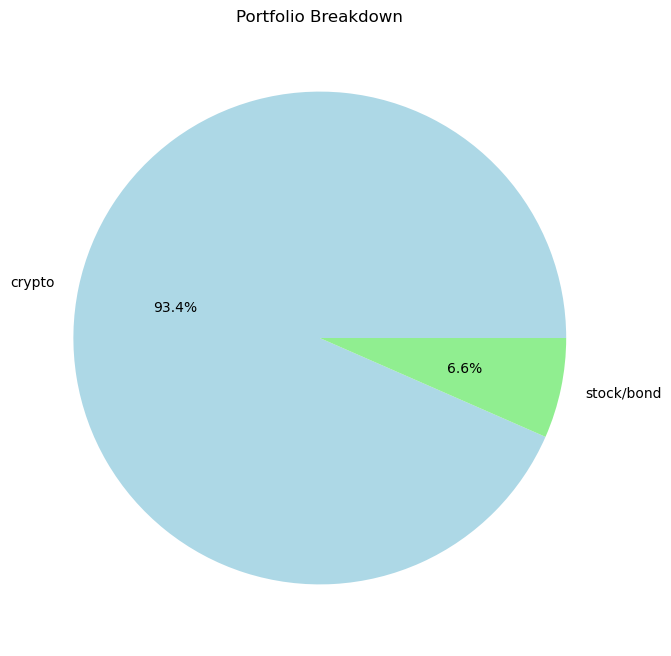

In [18]:
# Plot savings pie chart
plt.figure(figsize=(8, 8))
plt.pie(savings_df['amount'], labels=savings_df.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Portfolio Breakdown')
plt.show()


In [25]:
# Set ideal emergency fund
emergency_fund_value = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df['amount'].sum()

# Validate saving health
if total_savings > emergency_fund_value:
    print("Congratulations! You have enough savings for the ideal emergency fund.")
elif total_savings == emergency_fund_value:
    print("Congratulations! You have reached the important financial goal of the ideal emergency fund.")
else:
    shortfall = emergency_fund_value - total_savings
    print(f"You need ${shortfall:0.2f} more to reach the ideal emergency fund.")


Congratulations! You have enough savings for the ideal emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [27]:
#Setting variables for Dataframe
ticker = ["AGG", "SPY"]

timerframes = "1Day"
# Set start and end dates back five years from today.
start_date = pd.Timestamp('2018-10-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-20', tz='America/New_York').isoformat()

In [28]:
# Getting 5 years' worth of historical data for SPY and AGG
historic_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
#Filtering historic_data to get SPY & AGG
historic_data = historic_data[historic_data['symbol'].isin(['SPY', 'AGG'])]

# Separate ticker data
AGG_tick = historic_data[historic_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY_tick = historic_data[historic_data["symbol"]=="SPY"].drop("symbol", axis=1)



# Concatenate the ticker DataFrames
historic_data = pd.concat([AGG_tick, SPY_tick], axis=1, keys=['SPY', 'AGG'])
# Display sample data
historic_data.head(20)


SPY                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2018-10-19 04:00:00+00:00  104.37  104.5500  104.3400       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.5200  104.3400       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.7400  104.4750       14144  104.67   
2018-10-24 04:00:00+00:00  104.75  104.8100  104.6700       17520  104.69   
2018-10-25 04:00:00+00:00  104.66  104.7700  104.6100       15828  104.71   
2018-10-26 04:00:00+00:00  104.90  105.0500  104.8700       15037  104.88   
2018-10-29 04:00:00+00:00  104.79  104.8900  104.7200       13689  104.86   
2018-10-30 04:00:00+00:00  104.64  104.7800  104.6400       12042  104.68   
2018-10-31 04:00:00+00:00  104.59  104.7000  104.5000       40210  104.50   
2018-11-01 04:00:00+00:00  104.34  104.4100  104.2100       21872  104.22   
2018-11-02 04:00:00+00:00  104.03  104.2900  103.9400       15973  104.25   
2018-11-05 05:00:00+00:00  104.10  104.1700  104.0700       11362  104.14   
2018-11-06 05:00:00+00:00  104.11  104.1699  104.0635       10446  104.09   
2018-11-07 05:00:00+00:00  104.20  104.3600  104.1400       15114  104.25   
2018-11-08 05:00:00+00:00  104.01  104.2200  104.0000       11544  104.19   
2018-11-09 05:00:00+00:00  104.14  104.2500  104.0700       11156  104.07   
2018-11-12 05:00:00+00:00  104.31  104.3500  104.2500        9473  104.31   
2018-11-13 05:00:00+00:00  104.35  104.3700  104.2131       12681  104.30   
2018-11-14 05:00:00+00:00  104.36  104.5000  104.2000       14144  104.22   
2018-11-15 05:00:00+00:00  104.49  104.5100  104.3101       13033  104.48   

                                                      AGG                     \
                             volume        vwap     close     high       low   
timestamp                                                                      
2018-10-19 04:00:00+00:00   3105921  104.390878  276.1797  279.300  275.4700   
2018-10-22 04:00:00+00:00   2948119  104.408492  275.0300  277.360  274.4100   
2018-10-23 04:00:00+00:00   3695313  104.605860  273.5200  274.870  268.6100   
2018-10-24 04:00:00+00:00   4849462  104.742653  265.2100  273.760  264.7000   
2018-10-25 04:00:00+00:00  12638378  104.664656  270.0100  271.810  266.2300   
2018-10-26 04:00:00+00:00   7199420  104.931247  265.2200  271.000  262.2900   
2018-10-29 04:00:00+00:00   6547859  104.797963  263.6900  270.250  259.8500   
2018-10-30 04:00:00+00:00   2831276  104.689661  267.8800  268.120  263.1200   
2018-10-31 04:00:00+00:00  16458695  104.598448  270.6900  273.230  270.1200   
2018-11-01 04:00:00+00:00   8799790  104.334351  273.3700  273.730  270.3800   
2018-11-02 04:00:00+00:00   4620690  104.066112  271.8000  275.230  269.5900   
2018-11-05 05:00:00+00:00   3951758  104.109446  273.4700  274.010  271.3500   
2018-11-06 05:00:00+00:00   2672159  104.109635  275.1100  275.300  273.2500   
2018-11-07 05:00:00+00:00   5003115  104.234319  281.0000  281.100  277.0800   
2018-11-08 05:00:00+00:00   3542707  104.127309  280.4800  281.220  279.2200   
2018-11-09 05:00:00+00:00   3111268  104.155367  277.8200  279.240  276.1800   
2018-11-12 05:00:00+00:00   3274844  104.309290  272.4795  277.460  271.9900   
2018-11-13 05:00:00+00:00   3054248  104.303009  272.0400  275.325  271.2500   
2018-11-14 05:00:00+00:00   3635975  104.366271  270.1500  274.610  268.4500   
2018-11-15 05:00:00+00:00   4046649  104.423564  273.0100  273.540  267.0102   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-10-19 04:00:00+00:00      582243  277.13  140662678  277.063759  
2018-10-22 04:00:00+00:00      449535  277.00   83420677  275.565255  
2018-10-23 04:00:00+00:00      837023  270.95  148031789  271.

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_agg_spy = MCSimulation(
    portfolio_data = historic_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [30]:
# Printing the simulation input data
MC_agg_spy.portfolio_data.head()

SPY                                       \
                            close    high      low trade_count    open   
timestamp                                                                
2018-10-19 04:00:00+00:00  104.37  104.55  104.340       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.52  104.340       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.74  104.475       14144  104.67   
2018-10-24 04:00:00+00:00  104.75  104.81  104.670       17520  104.69   
2018-10-25 04:00:00+00:00  104.66  104.77  104.610       15828  104.71   

                                                                   AGG  \
                             volume        vwap daily_return     close   
timestamp                                                                
2018-10-19 04:00:00+00:00   3105921  104.390878          NaN  276.1797   
2018-10-22 04:00:00+00:00   2948119  104.408492    -0.000192  275.0300   
2018-10-23 04:00:00+00:00   3695313  104.605860     0.001246  273.5200   
2018-10-24 04:00:00+00:00   4849462  104.742653     0.002584  265.2100   
2018-10-25 04:00:00+00:00  12638378  104.664656    -0.000859  270.0100   

                                                                          \
                             high     low trade_count    open     volume   
timestamp                                                                  
2018-10-19 04:00:00+00:00  279.30  275.47      582243  277.13  140662678   
2018-10-22 04:00:00+00:00  277.36  274.41      449535  277.00   83420677   
2018-10-23 04:00:00+00:00  274.87  268.61      837023  270.95  148031789   
2018-10-24 04:00:00+00:00  273.76  264.70      938613  273.33  180061325   
2018-10-25 04:00:00+00:00  271.81  266.23      733954  267.38  140353452   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-10-19 04:00:00+00:00  277.063759          NaN  
2018-10-22 04:00:00+00:00  275.565255    -0.004163  
2018-10-23 04:00:00+00:00  271.959702    -0.005490  
2018-10-24 04:00:00+00:00  269.071189    -0.030382  
2018-10-25 04:00:00+00:00  269.146254     0.018099

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_agg_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 110.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 120.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 130.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 140.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 150.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 160.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 170.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 180.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 190.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 200.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 210.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 220.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 230.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 240.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 250.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 260.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 270.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 280.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 290.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 300.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 310.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 320.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 330.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 340.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 350.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 360.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 370.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 380.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 390.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 400.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 410.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 420.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 430.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 440.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 450.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 460.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 470.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 480.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Running Monte Carlo simulation number 490.


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003305,1.005920,0.996127,1.020177,0.995182,0.996077,0.994838,0.994520,0.991619,0.999231,...,1.000358,1.000730,0.999439,0.999886,0.991416,0.995666,1.010142,0.998864,0.994274,0.992581
2,1.006752,1.009233,0.988799,1.025994,0.992170,1.000021,1.000305,1.003687,0.981683,1.001305,...,1.004653,1.002486,1.001717,0.996144,0.986375,0.999501,1.004679,1.004619,0.998893,0.994842
3,1.009474,1.017031,0.992648,1.026128,0.985795,1.000777,0.992496,1.018537,0.980662,1.000948,...,1.002947,0.988159,0.997450,0.993598,0.978777,0.997922,0.999144,1.004931,0.994282,0.998866
4,0.997053,1.018371,0.987357,1.026507,0.988009,0.994833,0.992070,1.020390,0.974074,0.999834,...,1.012380,0.999089,0.998827,0.984836,0.982134,0.996970,1.003035,1.002067,0.987077,0.997526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.089660,1.996749,0.792767,1.673249,2.738876,0.913786,2.248162,1.737910,1.908170,2.060117,...,4.434982,6.302557,1.699510,3.992152,4.227948,2.860286,1.286299,1.260135,1.532161,2.441187
7557,2.090380,2.018355,0.793390,1.679194,2.728070,0.911589,2.232129,1.747921,1.928020,2.064696,...,4.461623,6.353141,1.710733,3.968173,4.206233,2.841287,1.292686,1.260032,1.535806,2.417479
7558,2.098752,1.992122,0.794233,1.692052,2.722936,0.914211,2.236939,1.732034,1.930348,2.061747,...,4.448721,6.340787,1.727741,3.980742,4.246121,2.844354,1.306380,1.243173,1.541488,2.441659
7559,2.093403,1.999955,0.790753,1.677927,2.715925,0.913654,2.254923,1.718993,1.957946,2.059019,...,4.466885,6.319550,1.737540,3.998417,4.232257,2.858966,1.303563,1.243509,1.548152,2.424085


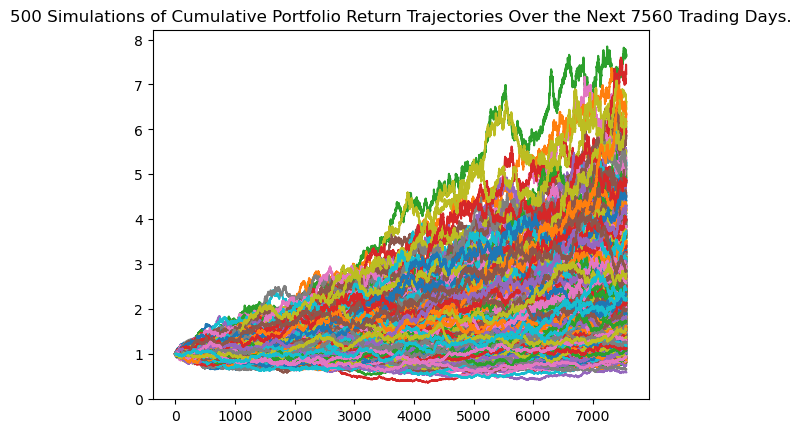

In [33]:
# Plot simulation outcomes
line_plot = MC_agg_spy.plot_simulation()

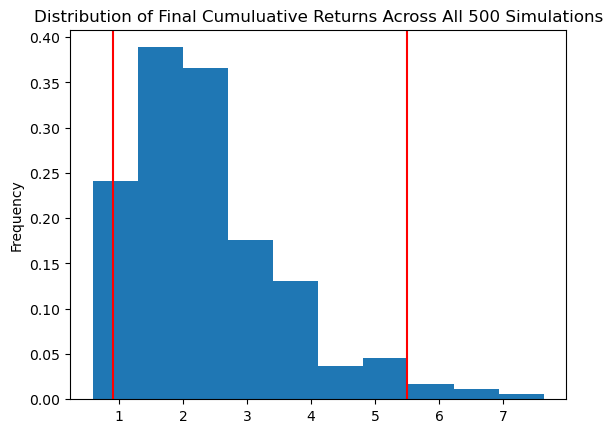

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_agg_spy.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat = MC_agg_spy.summarize_cumulative_return()

# Print summary statistics
print(summary_stat)

count           500.000000
mean              2.371796
std               1.194847
min               0.589317
25%               1.526771
50%               2.112669
75%               2.899669
max               7.637218
95% CI Lower      0.902056
95% CI Upper      5.497915
Name: 7560, dtype: float64


C:\Users\ryans\Ryans\Finanacial Planner\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18041.13 and $109958.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_increase = round(summary_stat[8]*initial_investment,2)
ci_upper_increase = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_increase} and ${ci_upper_increase}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $27061.69 and $164937.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")